Stream B: XENA UCSC's STAR aligned dataset

In [1]:
import pandas as pd
import numpy as np
import pycombat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# --- 1. Define File Paths ---
b_xena_expression_filepath = "data/raw/TcgaTargetGtex_rsem_gene_tpm.gz" 
b_xena_metadata_filepath = "data/raw/TcgaTargetGTEX_phenotype.txt.gz"

In [3]:
# --- 2. Load Expression Data ---
# sep='\t' means the file is tab-separated.
# set_index('sample') makes the gene IDs the rows.
b_xena_expression_df = pd.read_csv(
    b_xena_expression_filepath, 
    sep='\t', 
    index_col=0,  # Assumes the first column is the gene/sample name
    compression='gzip' # if your file ends in .gz
)

# --- 3. Load Metadata ---
b_xena_metadata_df = pd.read_csv(
    b_xena_metadata_filepath, 
    sep='\t',
    encoding='latin-1'
)

# # --- 4. Verify ---
print("--- Pipeline B (Xena) ---")
print("Expression Shape:", b_xena_expression_df.shape)
display(b_xena_expression_df.head())

print("\nMetadata Shape:", b_xena_metadata_df.shape)
display(b_xena_metadata_df.head())

--- Pipeline B (Xena) ---
Expression Shape: (60498, 19131)


,GTEX-S4Q7-0003-SM-3NM8M,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-QV31-1626-SM-2S1QC,TCGA-G3-A3CH-11,TCGA-B5-A5OE-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-B2-5641-11,GTEX-ZPCL-0126-SM-4WWC8,TARGET-20-PANGDN-09,...,TCGA-FI-A2EY-01,TCGA-55-6985-11,TCGA-EJ-5527-01,TCGA-G3-A25X-01,TCGA-24-2254-01,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-3.4580,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-4.0350,-2.0529,-9.9658,-9.9658,-1.9379,1.5165,-9.9658,-2.3884,0.0440,-3.3076
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112.3,-3.6259,-3.8160,-3.0469,-2.1779,-9.9658,-9.9658,-1.8314,-2.4659,-9.9658,-9.9658,...,-3.1714,-4.2934,-9.9658,-9.9658,-5.5735,-2.9324,-9.9658,-9.9658,2.5852,-3.0469
ENSG00000167578.16,4.5988,5.2998,4.8881,4.6294,3.5572,5.0858,6.4989,4.6317,5.5358,4.1376,...,4.7253,5.4206,4.4771,5.2627,5.0760,6.0809,4.7410,5.3212,5.8110,5.9132
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658



Metadata Shape: (19131, 7)


,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA


In [20]:
b_xena_expression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60498 entries, ENSG00000242268.2 to ENSG00000181518.3
Columns: 19131 entries, GTEX-S4Q7-0003-SM-3NM8M to GTEX-XV7Q-0426-SM-4BRVN
dtypes: float64(19131)
memory usage: 8.6+ GB


### Drop duplicates & NA (missing) values

In [ ]:
print(f"Original shape of data_B: {b_xena_expression_df.shape}")

genes_duplicated = b_xena_expression_df.index.duplicated().sum()
print(f"Duplicate genes (rows) found: {genes_duplicated}")

if genes_duplicated > 0:
    print("Removing duplicate genes...")
    expression_df = b_xena_expression_df.drop_duplicates()
    print(f"New genes shape after dropping duplicate samples: {expression_df.shape}")
else:
    expression_df = b_xena_expression_df

metadata_duplicated = b_xena_metadata_df.T.duplicated().sum()
print(f"Duplicate metadata (columns) found: {metadata_duplicated}")

if metadata_duplicated > 0:
    print("Removing duplicate metadata...")
    metadata_df = b_xena_metadata_df.drop_duplicates()
    print(f"New metadata shape after dropping duplicate samples: {expression_df.shape}")
else:
    metadata_df = b_xena_metadata_df


# --- Check for NA (Missing) Values ---
# data_B.isna().any() checks each column for NAs.
# .any() again checks if *any* column returned True.
na_values_found = expression_df.isna().any().any()
print(f"NA (missing) gene values found: {na_values_found}")

if na_values_found:
    # An NA value will break the model. The best strategy
    # is to remove the entire gene (row) that contains an NA.
    original_gene_count = expression_df.shape[0]
    
    # .dropna(axis=0) drops any ROW (gene) containing an NA.
    expression_df = expression_df.dropna(axis=0) 
    
    genes_removed = original_gene_count - expression_df.shape[0]
    print(f"Removed {genes_removed} genes that contained NA values.")
    print(f"New shape after dropping NA genes: {expression_df.shape}")

na_values_found = metadata_df.isna().any().any()
print(f"NA (missing) metadata values found: {na_values_found}")

if na_values_found:
    # An NA value will break the model. The best strategy
    # is to remove the entire gene (row) that contains an NA.
    original_gene_count = metadata_df.shape[0]
    
    # .dropna(axis=0) drops any ROW (gene) containing an NA.
    metadata_df = metadata_df.dropna(axis=0) 
    
    genes_removed = original_gene_count - metadata_df.shape[0]
    print(f"Removed {genes_removed} metadata that contained NA values.")
    print(f"New shape after dropping NA metadata: {metadata_df.shape}")

# --- Final Verification ---
print("\n--- Cleaning Complete ---")
print(f"Final gene expression shape: {expression_df.shape}")
print(f"Final metadata shape: {metadata_df.shape}")

Original shape of data_B: (60498, 19131)
Duplicate genes (rows) found: 0
Duplicate metadata (columns) found: 1
Removing duplicate metadata...
New shape after dropping duplicate samples: (60498, 19131)
NA (missing) gene values found: False
NA (missing) metadata values found: True
Removed 163 metadata that contained NA values.
New shape after dropping NA metadata: (18968, 7)

--- Cleaning Complete ---
Final gene expression shape: (60498, 19131)
Final metadata shape: (18968, 7)


### Distribution primary site / cancer types

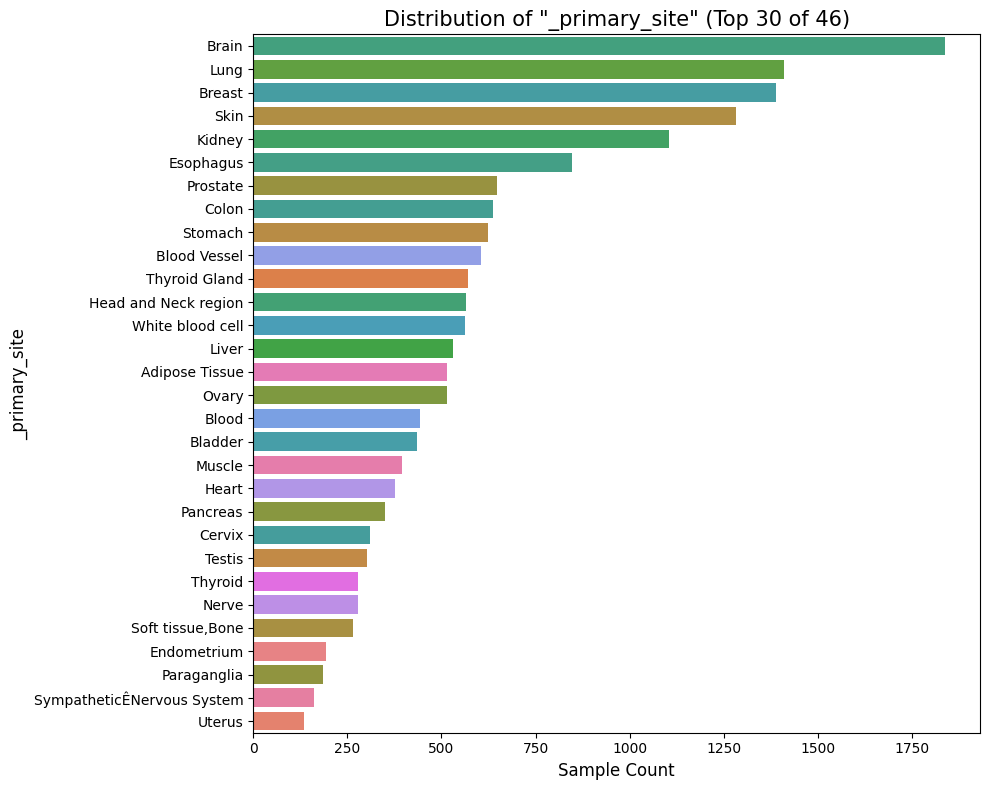

In [25]:
col = '_primary_site'
plt.figure(figsize=(10, 8))

top_n = 30
num_categories = metadata_df[col].nunique()

if num_categories > top_n:
    plot_title = f'Distribution of "{col}" (Top {top_n} of {num_categories})'
    top_categories = metadata_df[col].value_counts().nlargest(top_n).index
else:
    plot_title = f'Distribution of "{col}" (All {num_categories})'
    top_categories = metadata_df[col].value_counts().index

sns.countplot(
    y=col, 
    data=metadata_df, 
    order=top_categories,
    hue=col,
    legend=False
)

plt.title(plot_title, fontsize=15)
plt.xlabel('Sample Count', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show() # Display the plot

In [29]:
# We use .str.startswith('Brain') to get 'Brain' (TCGA) AND 'Brain - ...' (GTEx)
filter_condition = metadata_df['_primary_site'].str.startswith('Brain', na=False)
metadata_brain_df = metadata_df[filter_condition]

# --- Verification ---
print(f"Original shape: {metadata_df.shape}")
print(f"Filtered (Brain only) shape: {metadata_brain_df.shape}")

original_studies = set(metadata_df['_study'])
filtered_studies = set(metadata_brain_df['_study'])

print(f"\nOriginal studies: {original_studies}")
print(f"Filtered studies: {filtered_studies}")

if 'TARGET' in original_studies and 'TARGET' not in filtered_studies:
    print("Observation confirmed: 'TARGET' samples were successfully filtered out.")

Original shape: (18968, 7)
Filtered (Brain only) shape: (1839, 7)

Original studies: {'TARGET', 'TCGA', 'GTEX'}
Filtered studies: {'TCGA', 'GTEX'}
Observation confirmed: 'TARGET' samples were successfully filtered out.


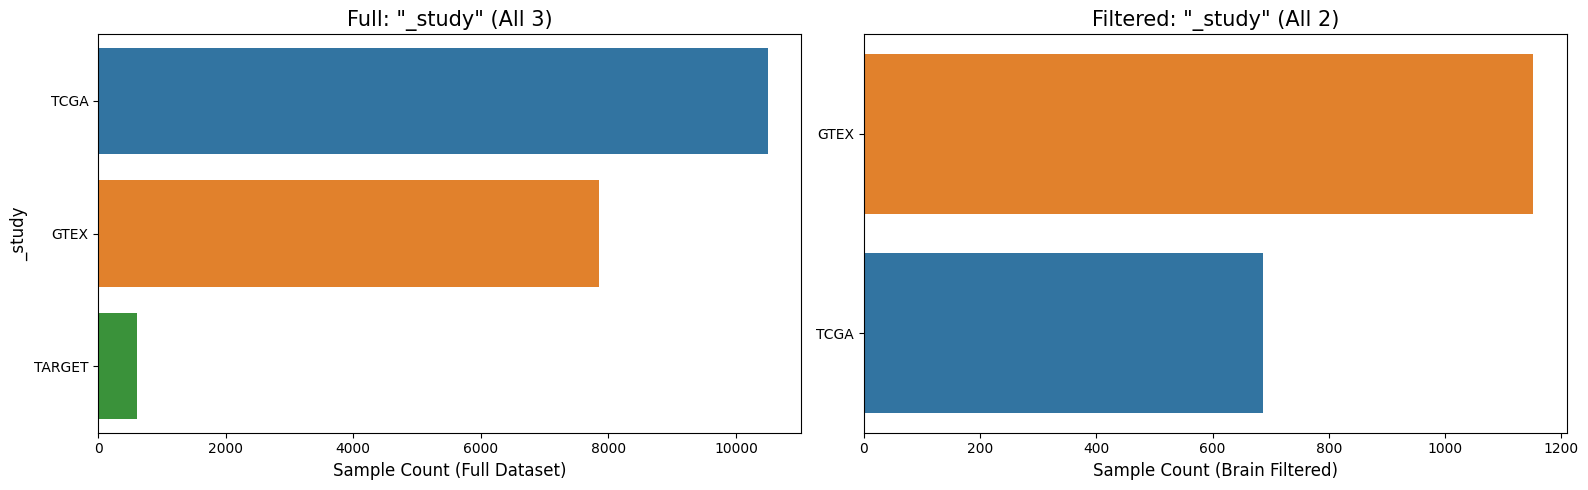

In [31]:
col = '_study'
# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

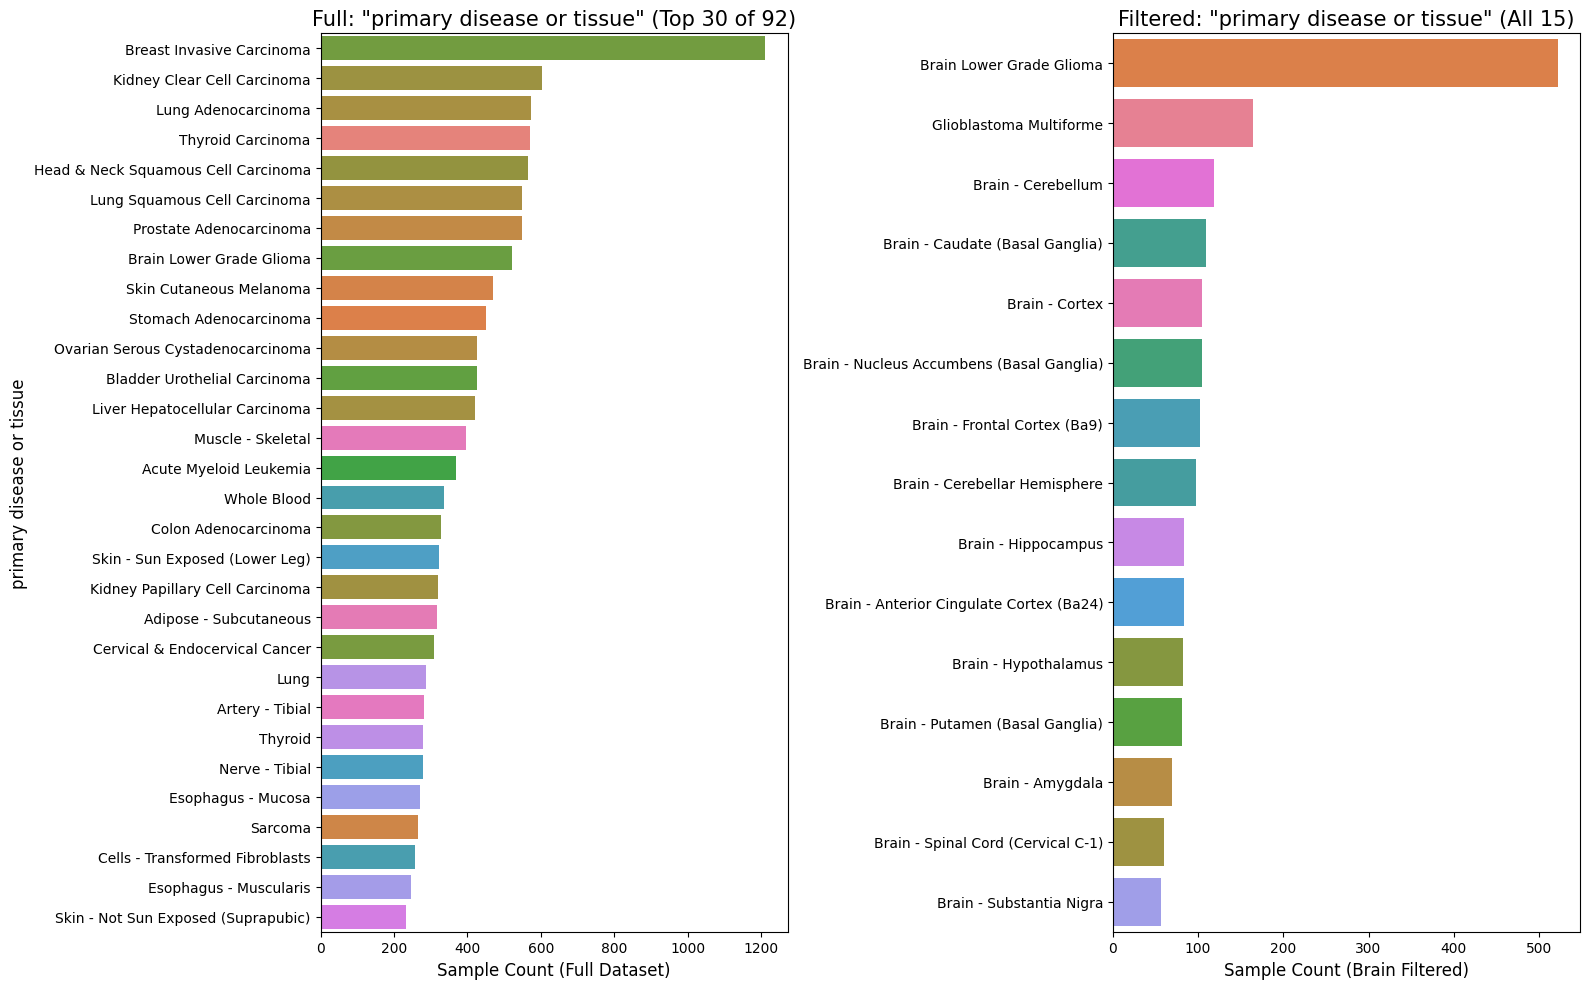

In [32]:
col = 'primary disease or tissue'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

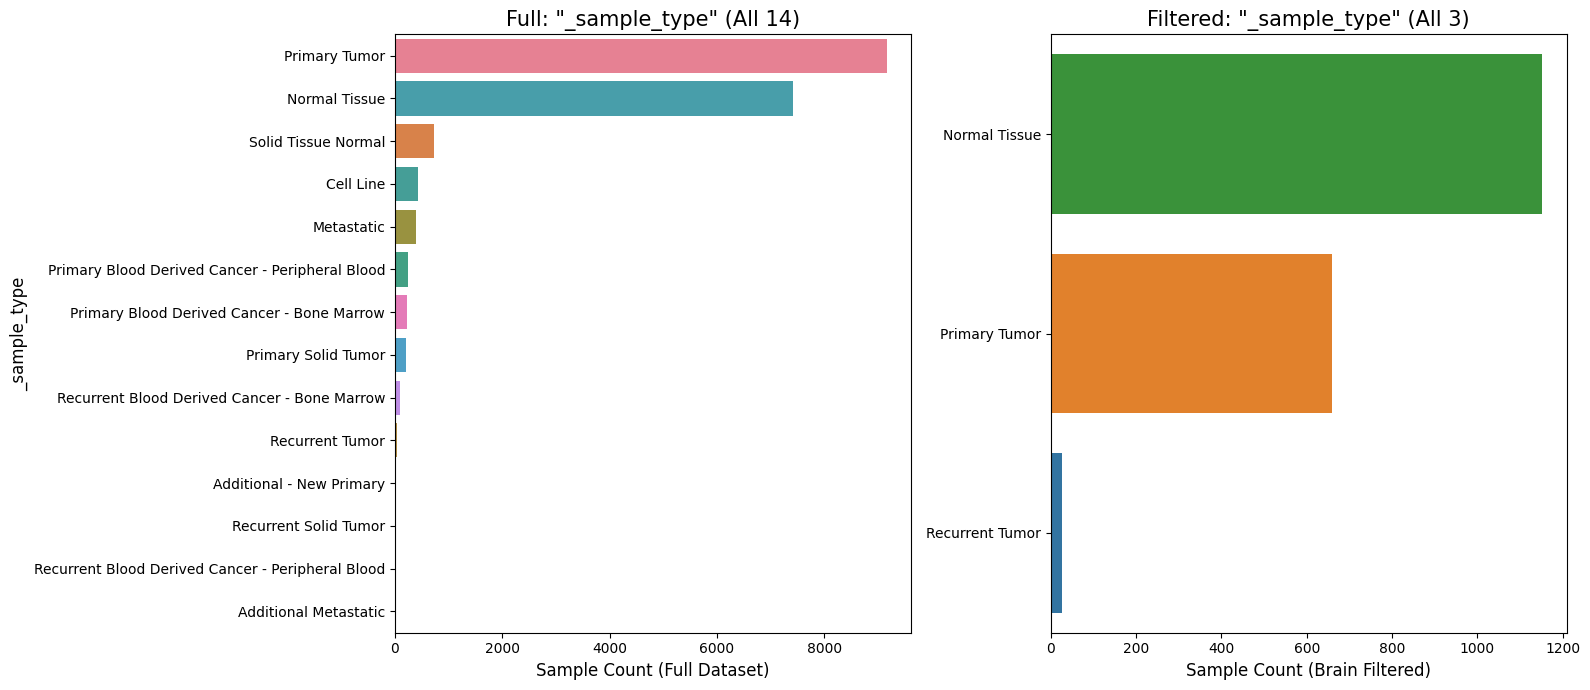

In [33]:
col = '_sample_type'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Left Plot (Full Dataset) ---
top_n_left = 30
num_cat_left = metadata_df[col].nunique()
if num_cat_left > top_n_left:
    title_left = f'Full: "{col}" (Top {top_n_left} of {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().nlargest(top_n_left).index
else:
    title_left = f'Full: "{col}" (All {num_cat_left})'
    top_cat_left = metadata_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_df, order=top_cat_left, hue=col, legend=False, ax=ax1)
ax1.set_title(title_left, fontsize=15)
ax1.set_xlabel('Sample Count (Full Dataset)', fontsize=12)
ax1.set_ylabel(col, fontsize=12)

# --- Right Plot (Filtered Dataset) ---
top_n_right = 30
num_cat_right = metadata_brain_df[col].nunique()
if num_cat_right > top_n_right:
    title_right = f'Filtered: "{col}" (Top {top_n_right} of {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().nlargest(top_n_right).index
else:
    title_right = f'Filtered: "{col}" (All {num_cat_right})'
    top_cat_right = metadata_brain_df[col].value_counts().index
    
sns.countplot(y=col, data=metadata_brain_df, order=top_cat_right, hue=col, legend=False, ax=ax2)
ax2.set_title(title_right, fontsize=15)
ax2.set_xlabel('Sample Count (Brain Filtered)', fontsize=12)
ax2.set_ylabel(None) # Remove redundant y-label

plt.tight_layout()
plt.show()

In [34]:
metadata_brain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 7030 to 16193
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sample                     1839 non-null   object
 1   detailed_category          1839 non-null   object
 2   primary disease or tissue  1839 non-null   object
 3   _primary_site              1839 non-null   object
 4   _sample_type               1839 non-null   object
 5   _gender                    1839 non-null   object
 6   _study                     1839 non-null   object
dtypes: object(7)
memory usage: 114.9+ KB


### label mapping
- 1 - healthy.
- 2 - Lower Grade Glioma.
- 3 - Glioblastoma Multiforme.

In [58]:
healthy_metadata = metadata_brain_df[(
    (metadata_brain_df['_sample_type'] == 'Normal Tissue')
)].copy()
print(f"Created Healthy group with {len(healthy_metadata)} samples.")
healthy_metadata['label'] = 1

unhealthy_metadata = metadata_brain_df[(
    (metadata_brain_df['_sample_type'] == 'Primary Tumor')
)]
print(f"Created Unhealthy group with {len(unhealthy_metadata)} samples.")

unhealthy_llg_metadata = unhealthy_metadata[
    unhealthy_metadata['primary disease or tissue'] == 'Brain Lower Grade Glioma'
].copy()
print(f"Created Unhealthy LLG group with {len(unhealthy_llg_metadata)} samples.")
unhealthy_llg_metadata['label'] = 2

unhealthy_gbm_metadata = unhealthy_metadata[
    unhealthy_metadata['primary disease or tissue'] == 'Glioblastoma Multiforme'
].copy()
print(f"Created Unhealthy GBM group with {len(unhealthy_gbm_metadata)} samples.")
unhealthy_gbm_metadata['label'] = 3


combined_metadata_df = pd.concat([healthy_metadata, unhealthy_llg_metadata, unhealthy_gbm_metadata])
combined_metadata_df.info()


Created Healthy group with 1152 samples.
Created Unhealthy group with 660 samples.
Created Unhealthy LLG group with 508 samples.
Created Unhealthy GBM group with 152 samples.
<class 'pandas.core.frame.DataFrame'>
Index: 1812 entries, 10629 to 7194
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sample                     1812 non-null   object
 1   detailed_category          1812 non-null   object
 2   primary disease or tissue  1812 non-null   object
 3   _primary_site              1812 non-null   object
 4   _sample_type               1812 non-null   object
 5   _gender                    1812 non-null   object
 6   _study                     1812 non-null   object
 7   label                      1812 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 127.4+ KB


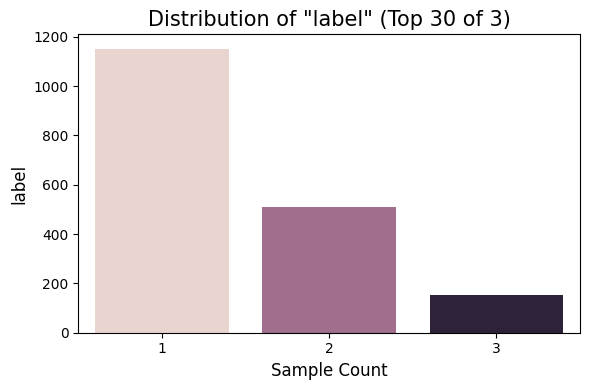

In [ ]:
col = 'label'
plt.figure(figsize=(6, 4))

top_n = 30
num_categories = combined_metadata_df[col].nunique()

plot_title = f'Distribution of "{col}" (Top {top_n} of {num_categories})'
top_categories = combined_metadata_df[col].value_counts().nlargest(top_n).index

sns.countplot(
    x=col, 
    data=combined_metadata_df, 
    order=top_categories,
    hue=col,
    legend=False,
    # palette=['#E63946', '#457B9D'] 
)

plt.title(plot_title, fontsize=15)
plt.xlabel('Sample Count', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. Combine Metadata & Get Final Sample List ---
# We already created b_gbm_metadata and b_gtex_metadata in the last step
b_samples_to_keep = combined_metadata_df['sample'].tolist()

print(f"Total samples to keep for analysis: {len(b_samples_to_keep)}")

# --- 2. Filter Expression Data ---
# Select only the columns (samples) we want
# We use .copy() to prevent pandas warnings
filtered_genes = b_xena_expression_df[
    b_xena_expression_df.columns.intersection(b_samples_to_keep)
].copy()

# --- 3. Clean Gene IDs ---
# Clean gene IDs (e.g., 'ENSG00000000003.15' -> 'ENSG00000000003')
# filtered_genes.index = filtered_genes.index.str.split('.').str[0]

print(f"Filtered expression matrix shape: {filtered_genes.shape}")

# --- 6. Verify Final ---
print("\n--- Pipeline B Complete ---")
print(f"Final `gene` matrix shape: {filtered_genes.shape}")
display(filtered_genes.head())

Total samples to keep for analysis: 1812
Filtered expression matrix shape: (60498, 1812)

--- Pipeline B Complete ---
Final `gene` matrix shape: (60498, 1812)


,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,GTEX-N7MS-2526-SM-26GMA,GTEX-N7MS-2526-SM-26GMR,GTEX-NPJ7-0011-R6a-SM-2I3G7,...,TCGA-06-0745-01,GTEX-13G51-0011-R6b-SM-5LZX4,TCGA-TM-A84B-01,GTEX-YFC4-0011-R10a-SM-4SOK5,TCGA-DU-A76O-01,GTEX-13112-0011-R4b-SM-5DUXL,GTEX-1313W-0011-R1b-SM-5EQ4A,TCGA-CS-4944-01,TCGA-HT-7603-01,GTEX-Q2AG-2826-SM-2HMJQ
sample,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,-9.9658,0.2998,-9.9658,-0.4521,-4.2934,-2.5479,-0.6193,-0.5756,-2.8262,-0.5973,...,-1.2481,-1.0262,1.1117,-0.6416,-9.9658,-2.5479,-1.5522,-9.9658,-9.9658,0.0440
ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112.3,-3.8160,-3.0469,-1.8314,-0.7346,0.1519,0.9115,-2.6349,3.7204,1.7489,-0.8084,...,1.2147,-0.8599,1.8242,1.2576,-6.5064,-1.0862,0.6880,-4.2934,1.0642,2.5852
ENSG00000167578.16,5.2998,4.8881,6.4989,5.7632,6.1687,5.6329,5.8709,6.0086,2.1894,5.4350,...,6.0330,5.6789,4.6809,6.5322,6.2263,5.5100,6.1258,6.6567,6.8560,5.8110
ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [ ]:
# --- 1. Define Output Filenames ---
scaled_data_filepath = "data/processed/gene_expression.csv"
labels_filepath = "data/processed/metadata.csv"

# --- 2. Prepare Data for Scaling ---
gene_scaled_T = filtered_genes.T

# --- 3. Apply StandardScaler ---
scaler = StandardScaler()
gene_scaled_array = scaler.fit_transform(gene_scaled_T)

# --- 4. Convert Scaled Data Back to DataFrame ---
gene_scaled_df = pd.DataFrame(
    gene_scaled_array,
    index=gene_scaled_T.index,
    columns=gene_scaled_T.columns
)

# --- 5. Save Scaled Data (FIXED) ---
# We add index_label='sample_id' to name the first column
gene_scaled_df.to_csv(scaled_data_filepath, index_label='sample_id')
print(f"Scaled data saved to: {scaled_data_filepath}")

# --- 6. Prepare and Save Labels ---
labels_df = combined_metadata_df.set_index('sample').copy()
final_labels_df = labels_df[['label']]

# --- 7. Save Labels (FIXED) ---
# We add index_label='sample_id' here too for consistency
final_labels_df.to_csv(labels_filepath, index_label='sample_id')
print(f"Labels saved to: {labels_filepath}")

Scaled data saved to: data/processed/gene_expression.csv
Labels saved to: data/processed/metadata.csv


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [78]:
# --- 1. Load Your Saved Data ---
# scaled_data_filepath = "data_3class_scaled.csv"
# labels_filepath = "data_3class_labels.csv"

# # Load X (features), setting the first column (sample_id) as the index
# X = pd.read_csv(scaled_data_filepath, index_col='sample_id')
X = gene_scaled_df

# # Load y (labels), setting the first column (sample_id) as the index
# y = pd.read_csv(labels_filepath, index_col='sample_id')
y = final_labels_df

print(f"Loaded X (features) with shape: {X.shape}")
print(f"Loaded y (labels) with shape: {y.shape}")

# --- 2. Run PCA ---
# We already scaled the data, so we can run PCA directly
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Get the variance explained by each component
variance_explained = pca.explained_variance_ratio_
pc1_var = variance_explained[0] * 100
pc2_var = variance_explained[1] * 100

print("PCA complete.")

# --- 3. Create PCA Results DataFrame ---
# Put the PCA results into a DataFrame
pca_df = pd.DataFrame(
    data_pca,
    columns=['PC1', 'PC2'],
    index=X.index # Use the sample IDs from X as the index
)

# --- 4. Add Metadata for Plotting ---
# Add the 1, 2, 3 labels from our 'y' file
pca_df['label_id'] = y['label']

# Create a meaningful text label for plotting
text_label_map = {1: 'Healthy (1)', 2: 'LGG (2)', 3: 'GBM (3)'}
pca_df['Diagnosis'] = pca_df['label_id'].map(text_label_map)

# Infer the batch from the sample_id (TCGA or GTEX)
pca_df['Batch (Study)'] = ['TCGA' if 'TCGA' in idx else 'GTEX' for idx in pca_df.index]

print("PCA results merged with labels. Ready to plot.")
display(pca_df.head())

Loaded X (features) with shape: (1812, 60498)
Loaded y (labels) with shape: (1812, 1)
PCA complete.
PCA results merged with labels. Ready to plot.


,PC1,PC2,label_id,Diagnosis,Batch (Study)
TCGA-19-1787-01,60.882971,-85.311540,3,GBM (3),TCGA
TCGA-S9-A7J2-01,79.868666,-36.130488,2,LGG (2),TCGA
GTEX-13QIC-0011-R1a-SM-5O9CJ,-11.117254,-5.606935,1,Healthy (1),GTEX
TCGA-E1-A7YI-01,95.607049,-58.736480,2,LGG (2),TCGA
TCGA-06-5412-01,35.220211,-112.906859,3,GBM (3),TCGA


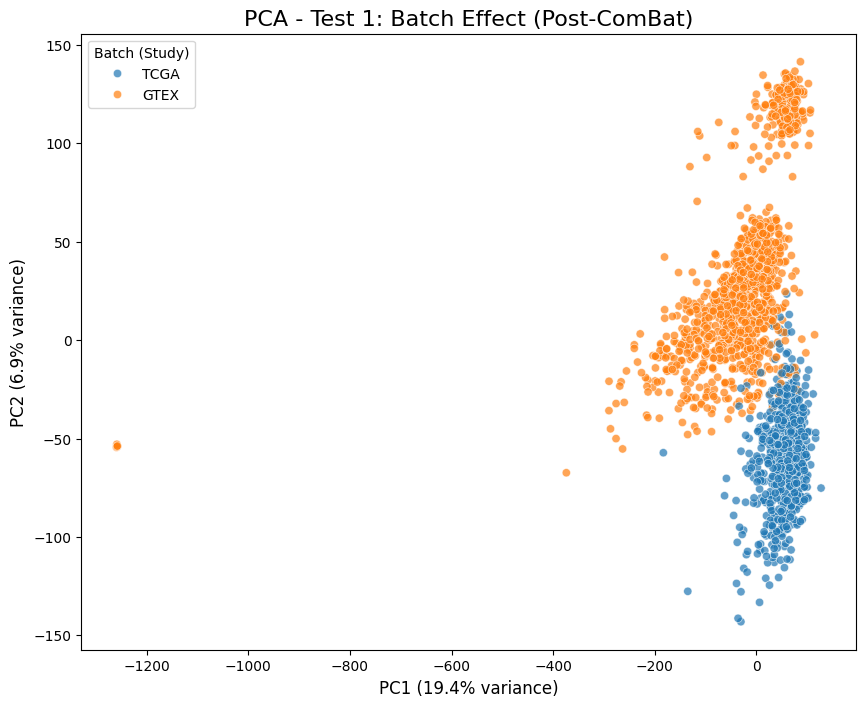

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Batch (Study)', # Color by batch (TCGA vs. GTEX)
    alpha=0.7
)
plt.title('PCA - Test 1: Batch Effect (Post-ComBat)', fontsize=16)
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)', fontsize=12)
plt.legend(title='Batch (Study)')
plt.show()

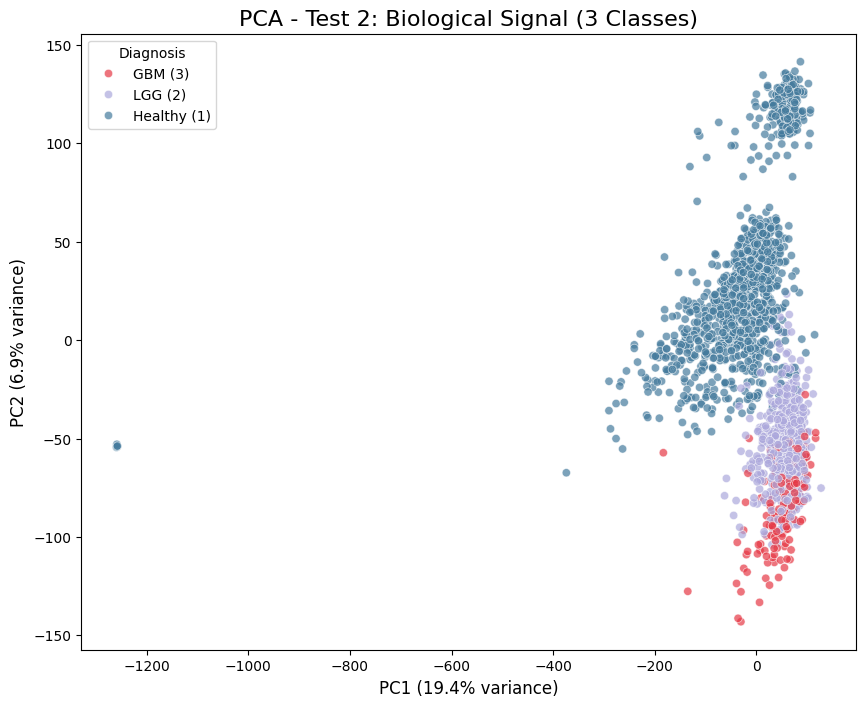

In [80]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Diagnosis', # Color by our new 3-class diagnosis
    palette={'Healthy (1)': '#457B9D', 'LGG (2)': "#ACA8DC", 'GBM (3)': '#E63946'},
    alpha=0.7
)
plt.title('PCA - Test 2: Biological Signal (3 Classes)', fontsize=16)
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)', fontsize=12)
plt.legend(title='Diagnosis')
plt.show()